In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# read file that has mnist data
file_data = "C:\\Users\\ckddn\\OneDrive\\바탕 화면\\학교\\4학년1학기\\패턴인식\\mnist_train.csv"
handle_file = open(file_data, "r")
data = handle_file.readlines()
handle_file.close()

In [6]:
size_row = 28 # height of the image
size_col = 28 # width of the image
num_image = len(data) # number of the images
count = 0 # count for the number of images

In [7]:
# normalize the values of the input data to be [0, 1]
def normalize(data):
    data_normalized = (data - min(data)) / (max(data) - min(data))
    return(data_normalized)

In [8]:
# make a matrix each column of which represents an images in a vector form
list_image = np.empty((size_row * size_col, num_image), dtype=float)
list_label = np.empty(num_image, dtype=int)
for line in data:
    line_data = line.split(',') # to anaylze CSV file
    label = line_data[0] # get label
    im_vector = np.asfarray(line_data[1:]) # get image vector 1 ~ 28*28 + 1
    im_vector = normalize(im_vector) # normalize 
    list_label[count] = label # save label
    list_image[:, count] = im_vector # save image array
    count += 1 # do until there is no next data

In [9]:
# count the number of labels to calculate average of each labels
num_labels = np.zeros(10, dtype=int)
for i in range(num_image):
    num_labels[list_label[i]] += 1
print(num_labels)

[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


$$L2-norm$$
$$||x|| = sqrt(x_1^2 + x_2^2 + \dots + x_n^2)$$

$$Average\: based\: on\: L2-norm$$
$$\frac{||x||^2}{n} = \frac{sqrt(x_1^2 + x_2^2 + \dots + x_n^2)}{n}$$

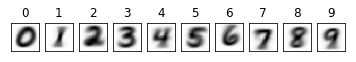

In [10]:
# calculate square sum of each image pixels
sum_L2norm_image = np.zeros((10, size_row * size_col), dtype=float);
for i in range(num_image):
    sum_L2norm_image[list_label[i],:] += list_image[:,i]**2
    
# calculate L2-norm of images
f1 = plt.figure(1)
for i in range(10):
    sum_L2norm_image[i] = np.sqrt(sum_L2norm_image[i]) / num_labels[i]
    im_vector = sum_L2norm_image[i]
    im_matrix = im_vector.reshape((size_row, size_col))
    plt.subplot(1, 10, i+1) # draw in (1, 10) matrix at i+1 block
    plt.title(i) # write label
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
plt.show()